# Genetic Algorithm Portfolio Optimization

## Dependencies Set-up

In [1]:
# --- Import Required Libraries ---
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

# --- Set Up Paths ---
ROOT_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
if ROOT_PATH not in sys.path:
    sys.path.insert(0, ROOT_PATH)
    
# --- Import Custom Libraries ---
from pop.runner import runner
from pop.util.print_results import print_results

## Parameters Definition

In [5]:
# --- Define Experiment Parameters ---
# Algorithm type: 'ga' (Genetic Algorithm) or 'pso' (Particle Swarm Optimization)
algorithm_type = "ga"

# Dataset folder name
dataset_folder_name = "../dataset"

# Number of companies to include in the portfolio
num_companies = 50

# Annual risk-free rate
risk_free_rate_annual = 0.042

# Analysis period
start_date = "2015-01-01"
end_date = "2020-01-01"

# Correlation level (optional): 'low', 'medium', 'high', or None
correlation_level = None

# Random seed for reproducibility
seed = 0

## Hyperparameter & Model Configuration

In [6]:
# --- Algorithm-Specific Parameters ---
# GA Parameters
ga_params = {
    "pop_size": 100,
    "max_generations": 300,
    "mutation_rate": 0.1,
    "gaussian_stdev": 0.1,
    "num_elites": 1,
    "tournament_size": 3,
}

# PSO Parameters
pso_params = {
    "swarm_size": 100,
    "max_iterations": 300,
    "w": 0.5,
    "c1": 1.5,
    "c2": 2.0,
}

# Repair method for constraint handling: 'normalize', 'clip', 'restart', 'shrink'
repair_method = "normalize"

## Experiment Execution

In [7]:
# --- Execute Experiment ---
if algorithm_type == "ga":
    params = ga_params
elif algorithm_type == "pso":
    params = pso_params
else:
    raise ValueError("Invalid algorithm type. Choose 'ga' or 'pso'.")

# Run the experiment
(results, fitness_history, diversity_history) = runner(
    algorithm_type=algorithm_type,
    dataset_folder_name=dataset_folder_name,
    num_companies=num_companies,
    risk_free_rate_annual=risk_free_rate_annual,
    start_date=start_date,
    end_date=end_date,
    correlation_level=correlation_level,
    seed=seed,
    repair_method=repair_method,
    **params
)

# --- Display Results ---
sharpe_ratio, annual_return, weights = results
print_results(sharpe_ratio, annual_return, weights)


                         PORTFOLIO OPTIMIZATION RESULTS

Sharpe Ratio: 0.7092160196301165
Annual Return: 243.99531758732132 (24399.531758732133%)

Portfolio Distribution:
--------------------------------------------------------------------------------
Company                                           Weight      Percentage
--------------------------------------------------------------------------------
Intuitive Surgical, Inc. - Common Stock           0.0969           9.69%
Nuveen Municipal Credit Income Fund               0.0930           9.30%
Innovative Solutions and Support, Inc. - Com...     0.0802           8.02%
Pivotal Investment Corporation II Class A Co...     0.0798           7.98%
Veracyte, Inc. - Common Stock                     0.0682           6.82%
Transcat, Inc. - Common Stock                     0.0607           6.07%
EastGroup Properties, Inc. Common Stock           0.0601           6.01%
NVR, Inc. Common Stock                            0.0452           4.52%
HubSp

In [8]:
# --- Save Results ---
# Simplify correlation level
correlation_str = {
    "low": "L",
    "medium": "M",
    "high": "H",
    None: "N"
}.get(correlation_level, "N")

# Simplify parameter string
if algorithm_type == "ga":
    algo_folder = "ga"
    param_str = f"ps-{ga_params['pop_size']}_mg-{ga_params['max_generations']}_mr-{ga_params['mutation_rate']}"
elif algorithm_type == "pso":
    algo_folder = "pso"
    param_str = f"ss-{pso_params['swarm_size']}_mi-{pso_params['max_iterations']}_w-{pso_params['w']}"

# Define the results directory relative to the project root
results_dir = os.path.join(ROOT_PATH, "experiments", "results", algo_folder)
os.makedirs(results_dir, exist_ok=True)

# Construct the filename
filename = f"exp_{correlation_str}_{param_str}.csv"
filepath = os.path.join(results_dir, filename)

# Prepare results for saving
results_df = pd.DataFrame([
    {"Company": k, "Weight": v, "Percentage": v * 100}
    for k, v in weights.items()
])

# Save the results
results_df.to_csv(filepath, index=False)
print(f"Results saved to {filepath}")

Results saved to c:\Users\Leonidas Brando\OneDrive - Universidad Politécnica de Madrid\2nd half - third year\bioinspired algorithms for optimization\project\portfolio_optimization\experiments\results\ga\exp_N_ps-100_mg-300_mr-0.1.csv


## Visualize fitness evolution

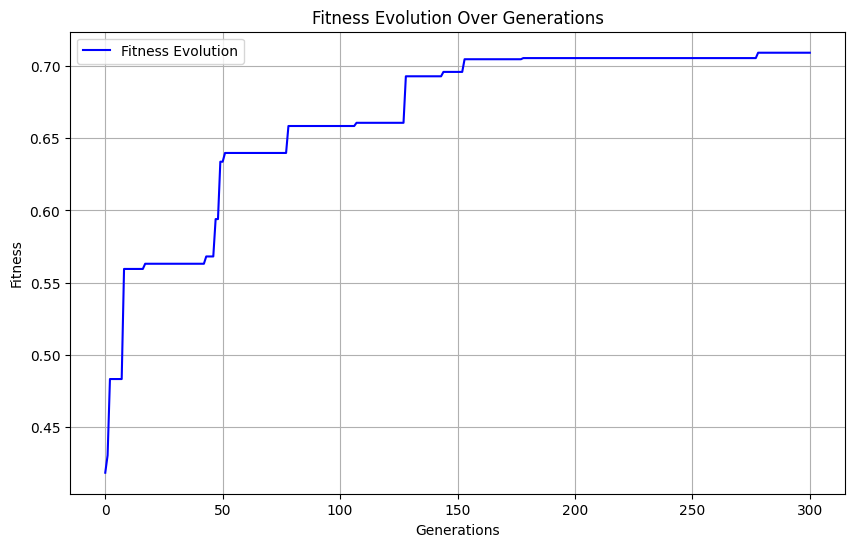

In [9]:
# ---Plotting Fitness Evolution---
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, label="Fitness Evolution", color="blue")
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# --- Save Fitness Evolution Plot ---
fitness_plot_path = os.path.join(results_dir, f"{filename}_fitness_evolution.png")
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, label="Fitness Evolution", color="blue")
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.grid()
plt.savefig(fitness_plot_path)
plt.clf()
print(f"Fitness evolution plot saved to {fitness_plot_path}")

Fitness evolution plot saved to c:\Users\Leonidas Brando\OneDrive - Universidad Politécnica de Madrid\2nd half - third year\bioinspired algorithms for optimization\project\portfolio_optimization\experiments\results\ga\exp_N_ps-100_mg-300_mr-0.1.csv_fitness_evolution.png


<Figure size 640x480 with 0 Axes>

## Visualize diversity evolution

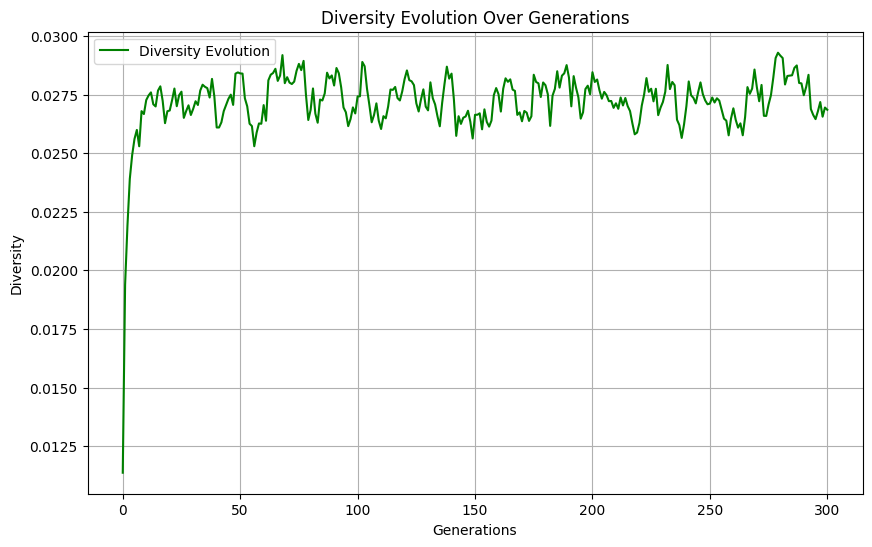

In [11]:
# --- Plot Diversity Evolution ---
plt.figure(figsize=(10, 6))
plt.plot(diversity_history, label="Diversity Evolution", color="green")
plt.title("Diversity Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Diversity")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# --- Save Diversity Evolution Plot ---
diversity_plot_path = os.path.join(results_dir, f"{filename}_diversity_evolution.png")
plt.figure(figsize=(10, 6))
plt.plot(diversity_history, label="Diversity Evolution", color="green")
plt.title("Diversity Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Diversity")
plt.legend()
plt.grid()
plt.savefig(diversity_plot_path)
plt.clf()
print(f"Diversity evolution plot saved to {diversity_plot_path}")

Diversity evolution plot saved to c:\Users\Leonidas Brando\OneDrive - Universidad Politécnica de Madrid\2nd half - third year\bioinspired algorithms for optimization\project\portfolio_optimization\experiments\results\ga\exp_N_ps-100_mg-300_mr-0.1.csv_diversity_evolution.png


<Figure size 640x480 with 0 Axes>